# [최종평가주차 코딩 실습](딥러닝 01. 신경망 기초 이론_케라스를 사용한 신경망 구현_20200206_03) keras를 사용하여 fashion_mnist데이터를 분류하는 모델을 만드세요
* keras로 fashion_mnist를 학습시키세요
* 모델이 예측한 test set데이터 X_test[20]의 class를 출력하고, X_test0[20]이미지를 출력하여 정확히 예측했는지 판단하세요
```
class 구분
0 : 티셔츠/탑
1 : 바지
2 : 풀오버(스웨터의 일종)
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠
```


In [ ]:
# 이 코드를 먼저 실행하세요

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

import matplotlib.pylab as plt

In [ ]:
# 여기에 코드를 작성하세요

# X_train0, y_train0 = 모델 학습에 사용되는 훈련 세트 (train_images, train_lables)
# X-test0, y_test0 = 모델 테스트에 사용되는 테스트 세트 (test_images, test_labels)

In [ ]:
# 변수로 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_train0.shape
# 이미지 6000개, 이미지 사이즈 28 * 28

(60000, 28, 28)

In [ ]:
len(y_train0)
#6000개 레이블

60000

In [ ]:
y_train0
#레이블 0~9사이 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
X_test0.shape
#테스트 세트 내 이미지 10000개, 이미지 크기 28*28

(10000, 28, 28)

In [ ]:
len(y_test0)
#레이블 10000개

10000

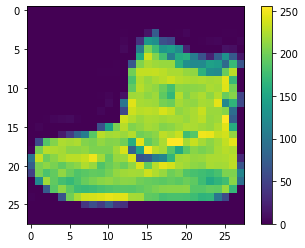

In [ ]:
#데이터 전처리

plt.figure()
plt.imshow(X_train0[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 값 범위를 0~1 사이로 조정하기

X_train0 = X_train0 / 255.0

X_test0 = X_test0 / 255.0

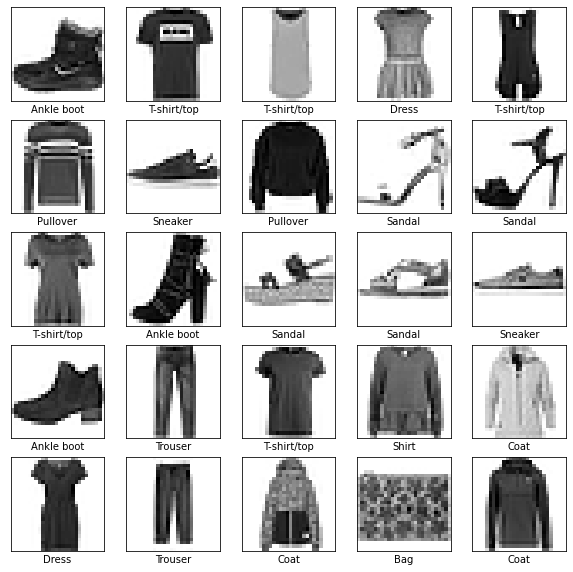

In [ ]:
# 훈련 준비
# 훈련세트에서 처음 25개, 클래스 이름 출력

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train0[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train0[i]])
plt.show()


In [ ]:
#모델 구성
#레이어 설정

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 훈련
model.fit(X_train0, y_train0, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6260 - accuracy: 0.7818
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2873 - accuracy: 0.8930


In [ ]:
# 정확도
test_loss, test_acc = model.evaluate(X_test0,  y_test0, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3383 - accuracy: 0.8799

테스트 정확도: 0.8798999786376953


In [ ]:
# 예측 만들기
predictions = model.predict(X_test0)

In [ ]:
predictions[0]

array([2.9907089e-06, 1.1332041e-07, 1.0043592e-06, 9.4333942e-08,
       2.2104354e-07, 1.1000327e-02, 5.7158568e-06, 8.1757210e-02,
       6.1318300e-05, 9.0717095e-01], dtype=float32)

In [ ]:
# 10개 클래스 예측 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

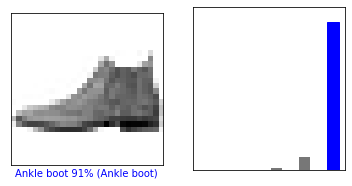

In [ ]:
# 0번째 원소 이미지, 예측, 신뢰도 점수 배열 확인
import numpy as np

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test0, X_test0)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test0)
plt.show()

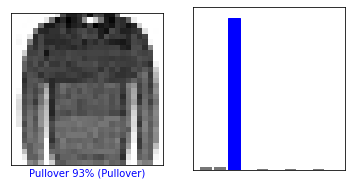

In [ ]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test0, X_test0)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test0)
plt.show()

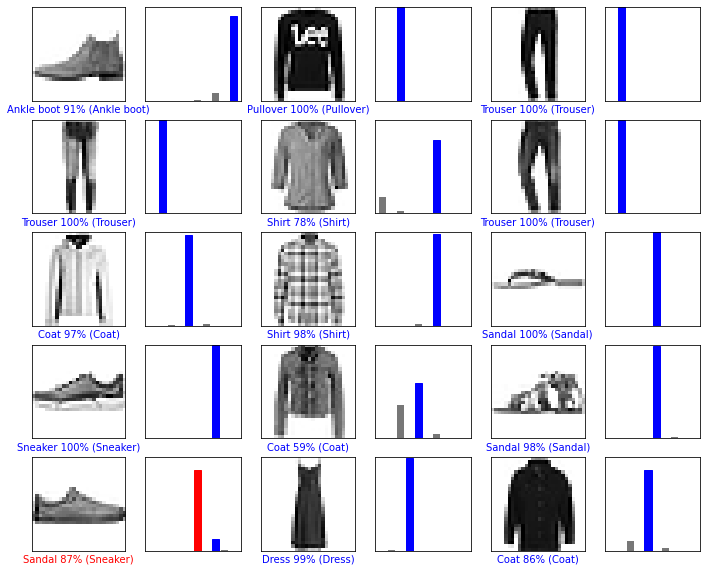

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test0, X_test0)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test0)
plt.show()

In [ ]:
# 훈련된 모델을 사용하여 한 이미지에 대한 예측 만들기
img = X_test0[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9907146e-06 1.1332052e-07 1.0043620e-06 9.4333942e-08 2.2104395e-07
  1.1000342e-02 5.7158568e-06 8.1757233e-02 6.1318417e-05 9.0717095e-01]]


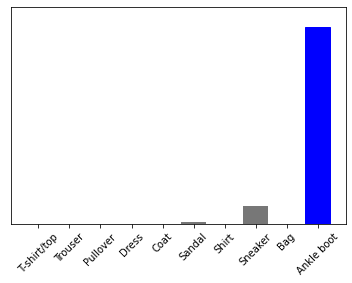

In [ ]:
plot_value_array(0, predictions_single, y_test0)
_ = plt.xticks(range(10), class_names, rotation=45)


In [ ]:
# 신뢰도가 가장 높은 레이블 > 9번레이블 = 앵클부츠
np.argmax(predictions_single[0])

9

In [ ]:
#확인
y_test0[0]

9

In [ ]:
# 결과 출력 코드
model.predict_classes(X_test0[[20],:],verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])

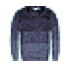

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[20],cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()